# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser


# Data Preprocessing

In [2]:
data = pd.read_csv('C:\\Users\\sambh\\Downloads\\FineTech_appData.csv')

In [3]:
data.shape

(50000, 12)

In [4]:
data.head(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [5]:
data.tail(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [6]:
# we cant't see the sixth column so to see that column we will use for loop
for i in [1,2,3,4,5]:
    print(data.loc[i,'screen_list'] , '\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [7]:
# check null values
data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [8]:
# errolled_date column has 18926 values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [10]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
features = data.columns
for i in features:
    print("""Unique value of {} \n {} \n len is {} \n .........\n
          """.format(i,data[i].unique(),len(data[i].unique())))
     

Unique value of user 
 [235136 333588 254414 ... 302367 324905  27047] 
 len is 49874 
 .........

          
Unique value of first_open 
 ['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638'] 
 len is 49747 
 .........

          
Unique value of dayofweek 
 [3 6 1 4 2 0 5] 
 len is 7 
 .........

          
Unique value of hour 
 [' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00'] 
 len is 24 
 .........

          
Unique value of age 
 [ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  7

# exploratory data analysis

In [12]:
data2 = data.drop(['user'  , 'first_open' , 'screen_list' , 'enrolled_date'], axis = 1)

In [13]:
data2.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,02:00:00,23,15,0,0,0,0
1,6,01:00:00,24,13,0,0,0,0
2,1,19:00:00,23,3,0,1,0,1
3,4,16:00:00,28,40,0,0,1,0
4,1,18:00:00,31,32,0,0,1,1
5,2,09:00:00,20,14,0,0,1,0


C:\Users\sambh\AppData\Local\Temp\ipykernel_9452\2477404711.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr() , annot = True, cmap = 'coolwarm')


Text(0.5, 1.0, 'Heatmap using correlational matrix of the updated dataset')

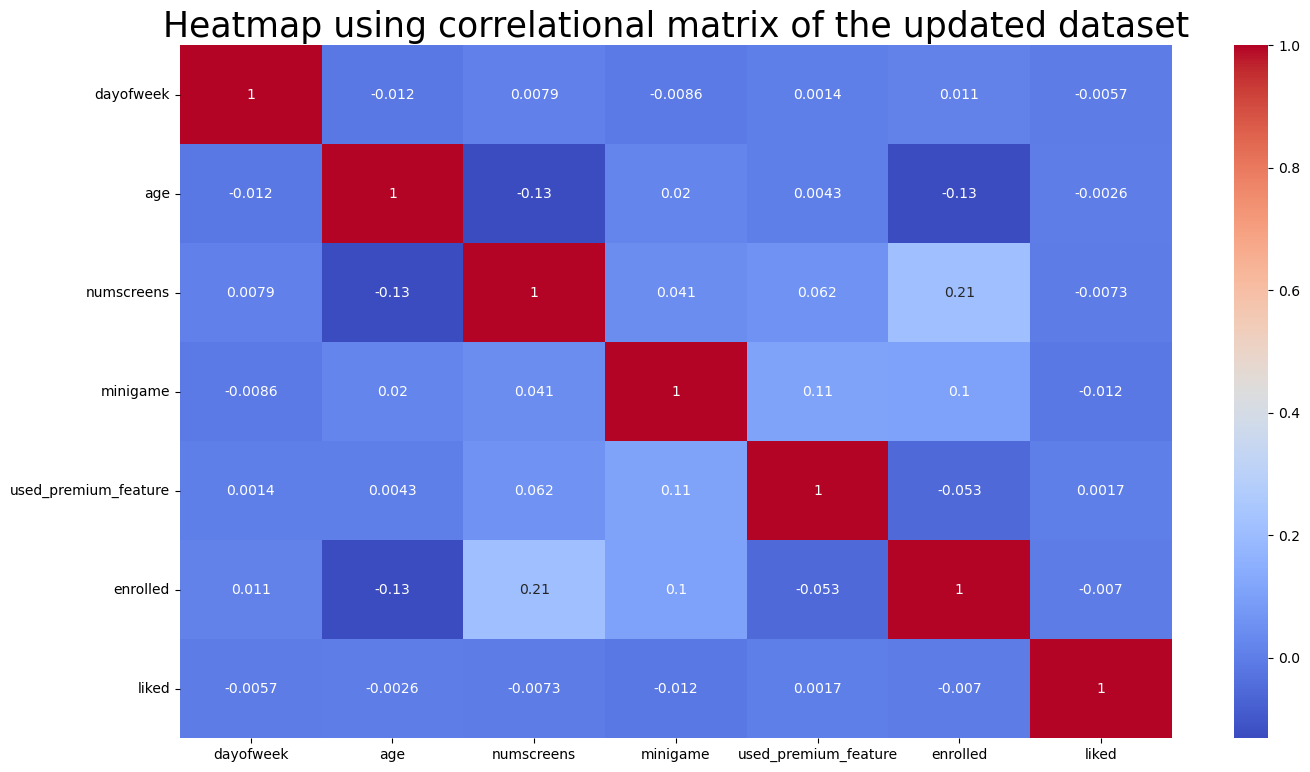

In [14]:
# Heatmap
plt.figure(figsize = (16,9))
sns.heatmap(data2.corr() , annot = True, cmap = 'coolwarm') 
plt.title("Heatmap using correlational matrix of the updated dataset" , fontsize = 25)


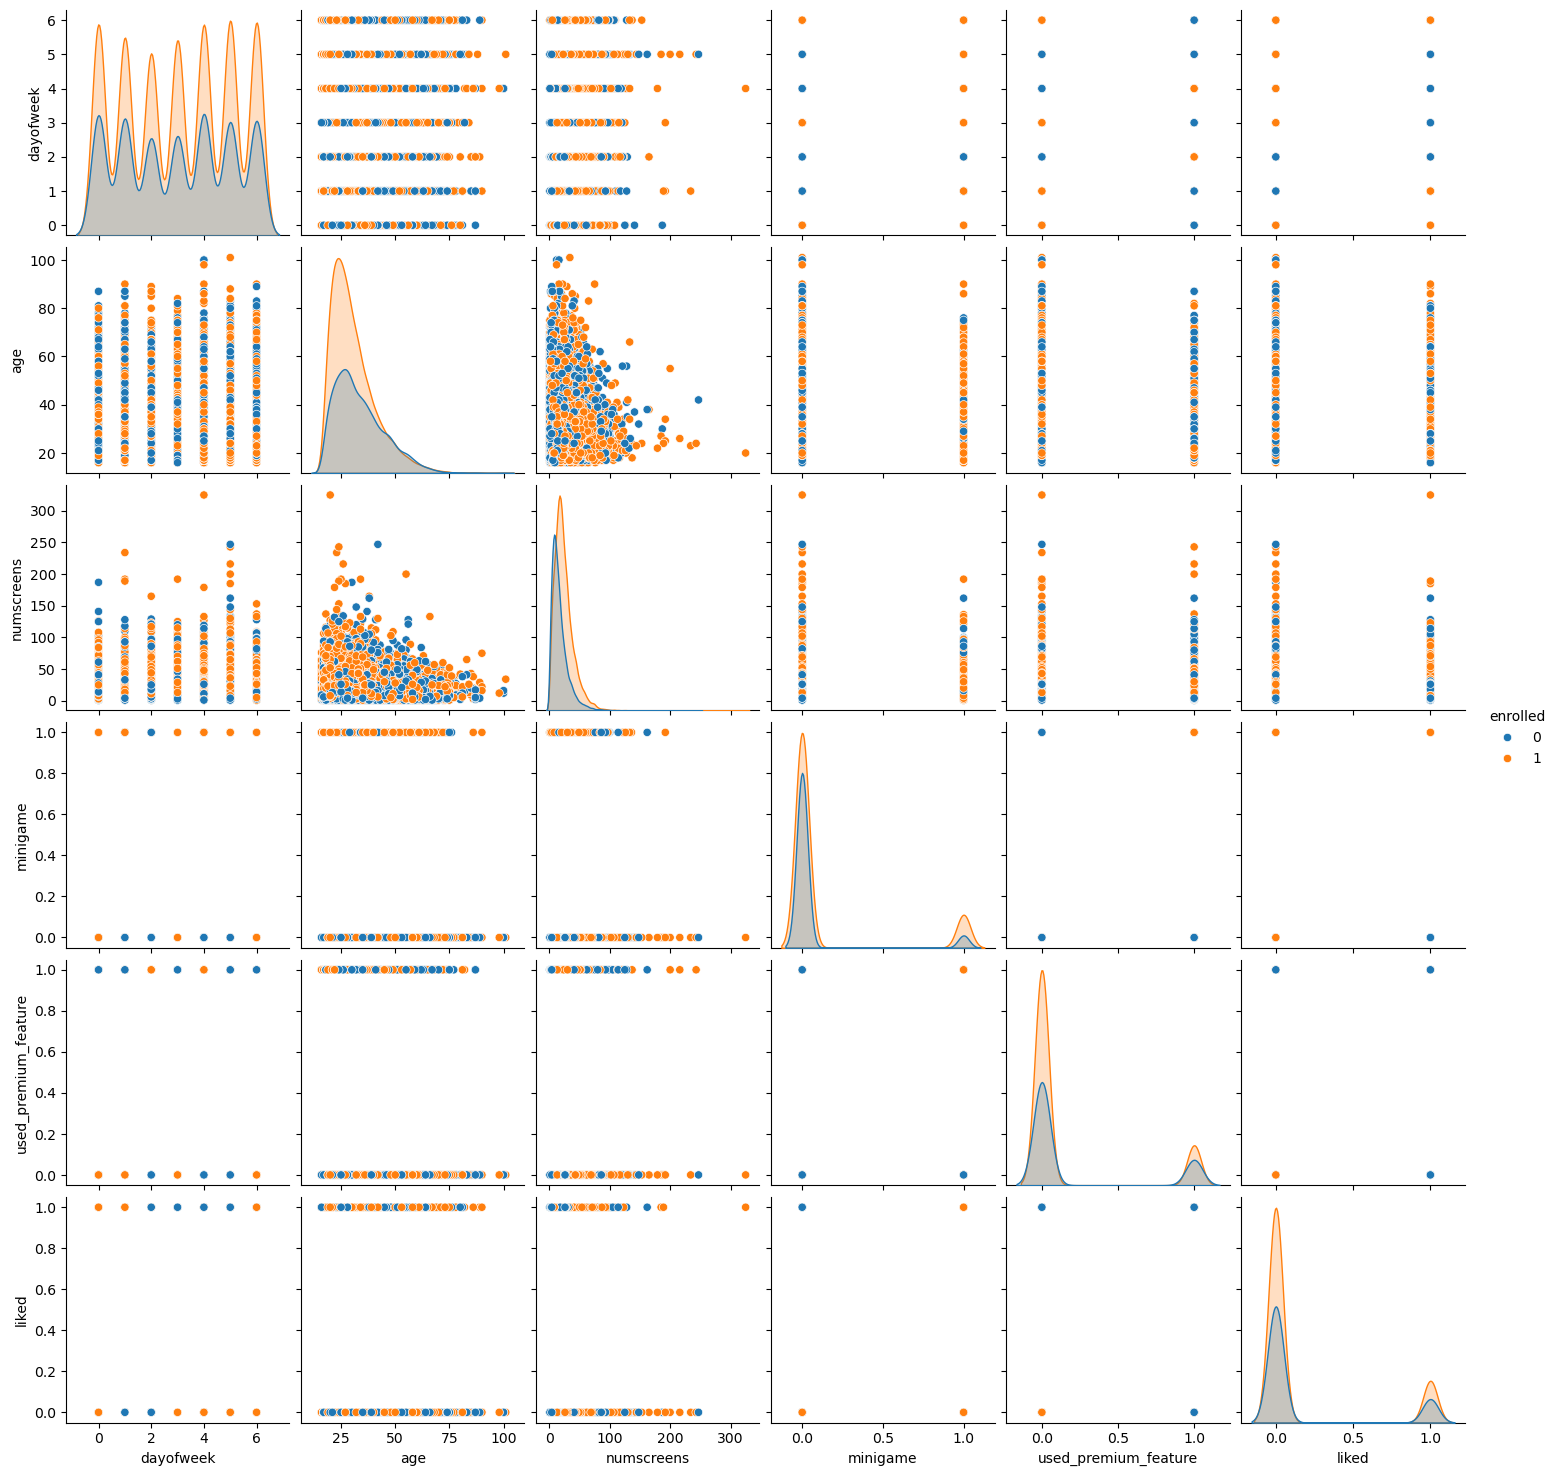

In [15]:
# pairplot
sns.pairplot(data2, hue = 'enrolled')

<Axes: ylabel='count'>

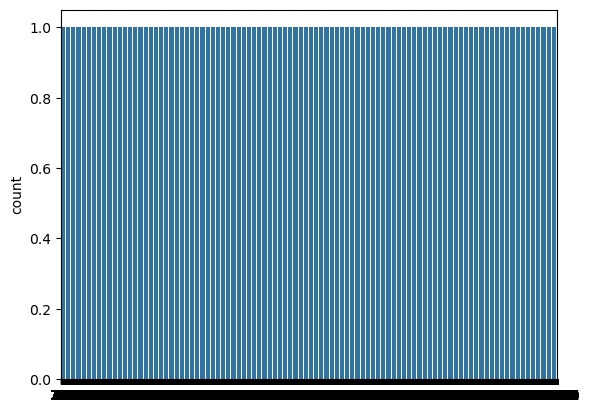

In [16]:
sns.countplot(data.enrolled)

In [17]:
print("Not enrolled user = " , (data.enrolled<1).sum() , "out of 50000")
print("Enrolled user = " , 50000-(data.enrolled<1).sum(), "out of 50000")


Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


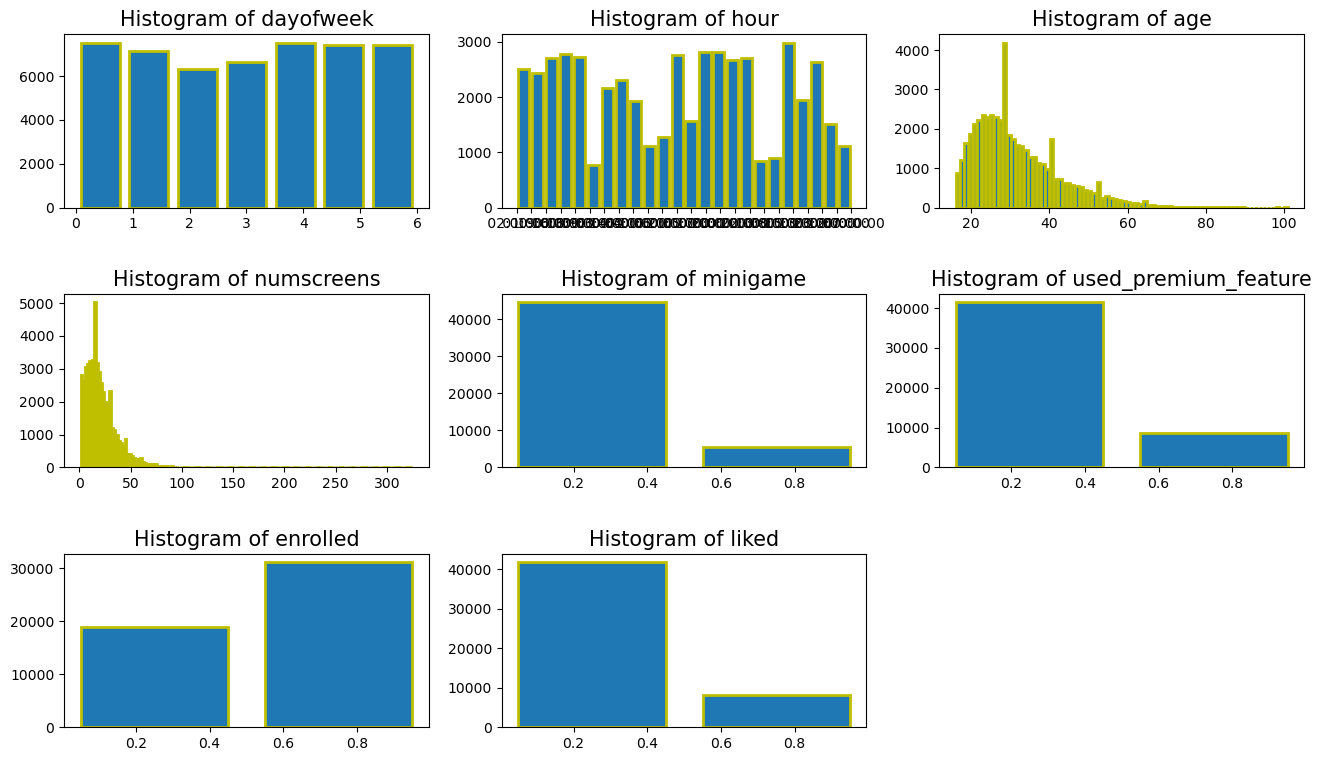

In [18]:
plt.figure(figsize= (16,9))
features = data2.columns
for i, j in enumerate(features):
    plt.subplot(3,3, i+1)
    plt.title("Histogram of {}".format(j) , fontsize = 15)
    
    bins = len(data2[j].unique())
    plt.hist(data2[j] , bins = bins , rwidth = 0.8 , edgecolor = "y" , linewidth = 2)
plt.subplots_adjust(hspace = 0.5)

C:\Users\sambh\AppData\Local\Temp\ipykernel_9452\256580287.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_enrolled = data3.corrwith(data2['enrolled'])


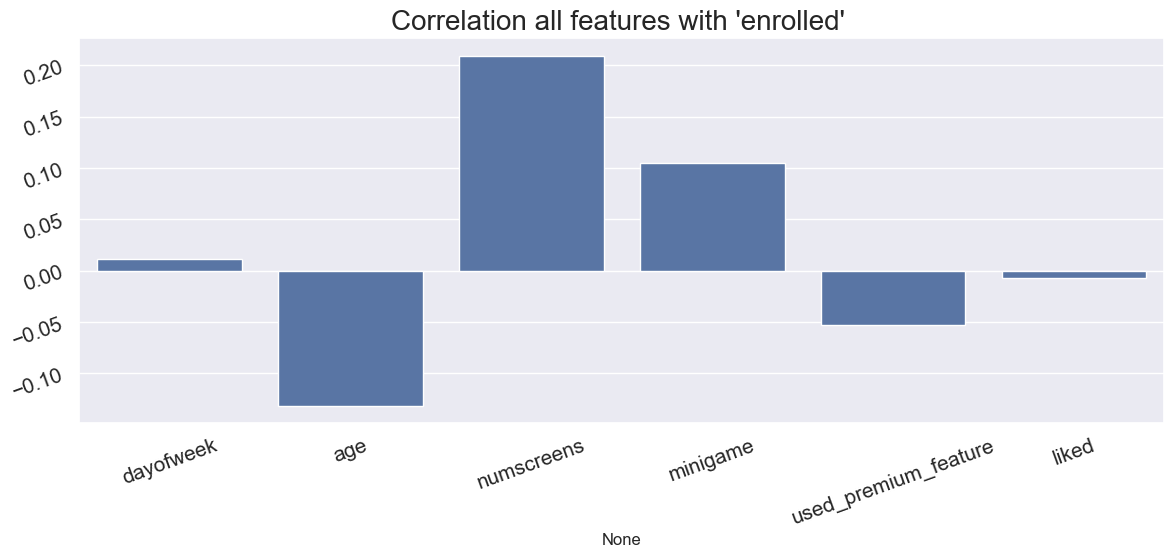

In [19]:
# Now we are trying to know which feature is strongly correlated with ‘enrolled’ feature with positive or negative through barplot.
sns.set()
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' " , fontsize = 20)
data3 = data2.drop(['enrolled'] , axis = 1)
correlation_with_enrolled = data3.corrwith(data2['enrolled'])
ax = sns.barplot(x=correlation_with_enrolled.index, y=correlation_with_enrolled.values)
ax.tick_params(labelsize = 15 , labelrotation = 20 , color = "k")                 


In [20]:
data['first_open'] =[parser.parse(i) for i in data['first_open']]
 
data['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in data['enrolled_date']]


#parser.parse(i) if isinstance(i, str) else i: This is a conditional expression (ternary operator) that checks if i is an instance of the str class using isinstance(i, str). If it is a string, parser.parse(i) is applied to convert it to a datetime object. If it is not a string (i.e., False), the original value i is retained.

In [21]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                            object
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [22]:
# time taken by the customer to get enrolled in the premium feature app after registration
data['time_to_enrolled'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

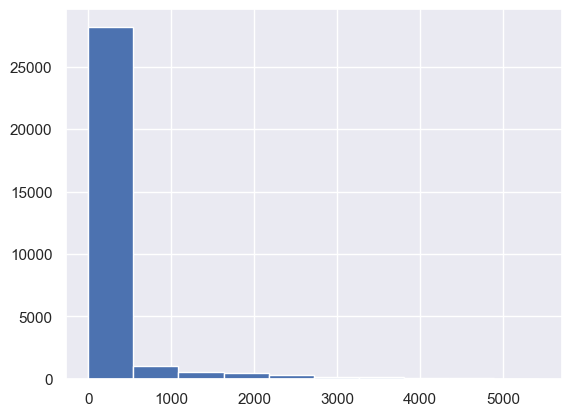

In [23]:
plt.hist(data['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

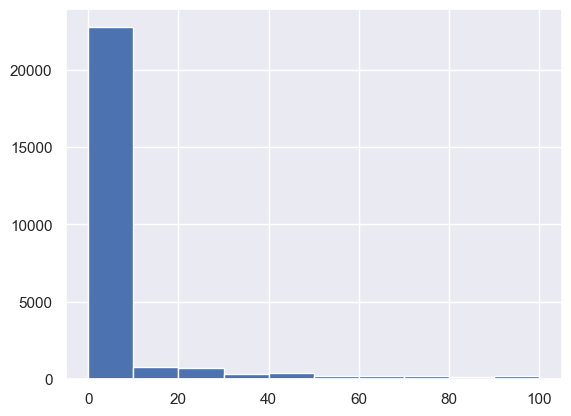

In [24]:
plt.hist(data['time_to_enrolled'].dropna(), range = (0,100)) 


# Feature selection

In [25]:
data.loc[data.time_to_enrolled > 48, 'enrolled'] = 0


In [26]:
data.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)


In [27]:
screen_data = pd.read_csv('C:\\Users\\sambh\\Downloads\\top_screens.csv').top_screens.values

In [28]:
screen_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [29]:
data['screen_list'] = data.screen_list.astype(str) + ','


In [30]:

# string into to number
 
for screen_name in screen_data:
    data[screen_name] = data.screen_list.str.contains(screen_name).astype(int)
    data['screen_list'] = data.screen_list.str.replace(screen_name+",", "")


In [31]:
# explanation :The first line of for loop creates a new column with the name specified by screen_name
# The values in this column are determined by whether the corresponding row's 'screen_list' column contains the screen_name. The str.contains(screen_name) returns a boolean Series indicating whether screen_name is present in each row of the 'screen_list' column. The astype(int) then converts True to 1 and False to 0, creating a binary column.
# This line modifies the 'screen_list' column by replacing occurrences of screen_name + "," with an empty string. It effectively removes the screen_name from the 'screen_list'. The , is included in the replacement to ensure that if screen_name is part of a larger string (e.g., "screen_name1, screen_name2"), only the specific screen_name is removed, and the comma is also removed.


In [32]:
data.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [33]:
data.shape

(50000, 68)

In [34]:
data.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,02:00:00,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19:00:00,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16:00:00,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18:00:00,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,09:00:00,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data.loc[0, 'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [36]:
	
# count remain screen list and store counted number in 'remain_screen_list'
 
data['remain_screen_list'] = data.screen_list.str.count(",")


In [37]:
data.drop(columns = ['screen_list'] , inplace = True)

In [38]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [39]:
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
data['saving_screens_count'] = data[saving_screens].sum(axis = 1)
data.drop(columns = saving_screens, inplace = True)

In [40]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
data['credit_screens_count'] = data[credit_screens].sum(axis = 1)
data.drop(columns = credit_screens, axis = 1, inplace = True)

In [41]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
data['cc_screens_count'] = data[cc_screens].sum(axis = 1)
data.drop(columns = cc_screens, inplace = True)


In [42]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
data['loan_screens_count'] = data[loan_screens].sum(axis = 1)
data.drop(columns = loan_screens, inplace = True)


In [43]:
data.shape

(50000, 50)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user                     50000 non-null  int64 
 1   dayofweek                50000 non-null  int64 
 2   hour                     50000 non-null  object
 3   age                      50000 non-null  int64 
 4   numscreens               50000 non-null  int64 
 5   minigame                 50000 non-null  int64 
 6   used_premium_feature     50000 non-null  int64 
 7   enrolled                 50000 non-null  int64 
 8   liked                    50000 non-null  int64 
 9   location                 50000 non-null  int32 
 10  Institutions             50000 non-null  int32 
 11  VerifyPhone              50000 non-null  int32 
 12  BankVerification         50000 non-null  int32 
 13  VerifyDateOfBirth        50000 non-null  int32 
 14  ProfilePage              50000 non-nul

In [45]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [46]:
clean_data = data
target = data['enrolled']
data.drop(columns = 'enrolled', inplace = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,  test_size = 0.2, random_state = 0)


In [47]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [48]:
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)


In [49]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


# Feature Scaling

In [50]:
# dealing with float values

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numeric and non-numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = StandardScaler()
non_numeric_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('non_num', non_numeric_transformer, non_numeric_cols)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the pipeline to training and test sets
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_preprocessed)
X_test_sc = sc.transform(X_test_preprocessed)


# Machine Learning Model Building

In [53]:
# The target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier


In [57]:
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)


0.6665

# K -Nearest Neighbor Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier


In [60]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)


0.6883

# Naive Bayes


In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
nb_model = GaussianNB()
nb_model.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model.predict(X_test_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.6537

# Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7162

# Support Vector Classifier

In [65]:
from sklearn.svm import SVC

In [66]:
svc_model = SVC()
svc_model.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model.predict(X_test_sc) 
accuracy_score(y_test, y_pred_svc_sc)

0.7444

# XGBoost Classifier

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model.predict(X_test_sc)
accuracy_score(y_test, y_pred_xgb_sc)

0.7511

In [69]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt1.fit(X_train_preprocessed, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test_preprocessed)
 
accuracy_score(y_test, y_pred_xgb_pt1)

0.7513

In [70]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7513

# Support Vector and XGBoost Classifier gives best accuracy than any othe machine Learning technique

# confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

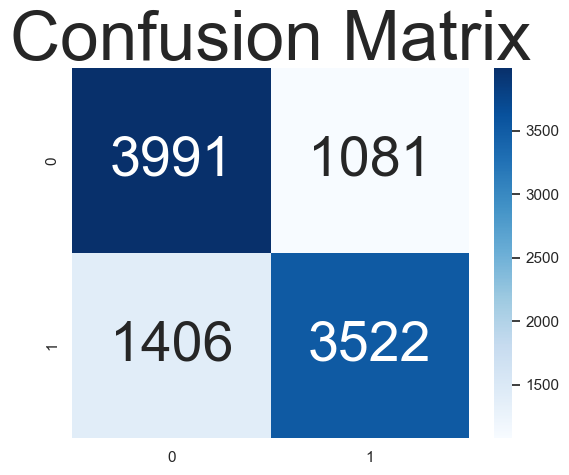

In [71]:
annot_size = 40
cmap = "Blues"
cm_xgb_pt2 =confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot=True, fmt='g', annot_kws={"size": annot_size} , cmap = cmap )
plt.title("Confusion Matrix", fontsize = 50) 

# Classification Report

In [72]:
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)


Classification report >>> 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      5072
           1       0.77      0.71      0.74      4928

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



# Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

Cross validation of XGBoost model =  [0.75175 0.734   0.7505  0.75525 0.743   0.746   0.74925 0.7465  0.75525
 0.74075]
Cross validation of XGBoost model (in mean) =  0.747225


# Mapping predicted output to the target

In [74]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2
 
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
...       ...       ...               ...
25091  143036         1                 0
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 0

[10000 rows x 3 columns]


# Save the ML model with Pickle

In [75]:
## Pickle
import pickle
 
# save model
pickle.dump(xgb_model_pt2, open('data_ML_model.pickle', 'wb'))
 
# load model
ml_model_pl = pickle.load(open('data_ML_model.pickle', 'rb'))
 
# predict the output
y_pred_pl = ml_model_pl.predict(X_test_sc)
 
# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)
 
# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))

Confussion matrix = 
 [[3991 1081]
 [1406 3522]]
Accuracy of model =  0.7513
